In [1]:
from hypso import Hypso1, Hypso2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
satobj = Hypso1(path=r"D:\Downloads\menindee_2025-02-18T00-10-42Z-l1a.nc")

In [5]:
satobj2 = Hypso1(path=r"D:\Downloads\victoriaLand_2025-02-07T20-35-33Z-l1a.nc")

In [5]:
rawcube=satobj.l1a_cube
satobj.generate_l1b_cube()
satobj.generate_l1c_cube()
satobj.generate_l1d_cube()


[INFO] Running track geometry computations...
[INFO] Running angles geometry computations...


In [7]:
# Print the min and max values for each cube level
print("L1A Cube (Raw Data):")
print(f"Min: {satobj.l1a_cube.min()}")
print(f"Max: {satobj.l1a_cube.max()}")
print()

print("L1B Cube (Calibrated Radiance):")
print(f"Min: {satobj.l1b_cube.min()}")
print(f"Max: {satobj.l1b_cube.max()}")
print()

print("L1C Cube (Calibrated Radiance with Smile Correction):")
print(f"Min: {satobj.l1c_cube.min()}")
print(f"Max: {satobj.l1c_cube.max()}")
print()

print("L1D Cube (TOA Reflectance):")
print(f"Min: {satobj.l1d_cube.min()}")
print(f"Max: {satobj.l1d_cube.max()}")


L1A Cube (Raw Data):
Min: <xarray.DataArray ()> Size: 8B
array(157.)
Max: <xarray.DataArray ()> Size: 8B
array(28030.)

L1B Cube (Calibrated Radiance):
Min: <xarray.DataArray ()> Size: 8B
array(0.)
Max: <xarray.DataArray ()> Size: 8B
array(179.21511833)

L1C Cube (Calibrated Radiance with Smile Correction):
Min: <xarray.DataArray ()> Size: 8B
array(0.)
Max: <xarray.DataArray ()> Size: 8B
array(179.21511833)

L1D Cube (TOA Reflectance):
Min: <xarray.DataArray ()> Size: 8B
array(-2.99311457)
Max: <xarray.DataArray ()> Size: 8B
array(-0.)


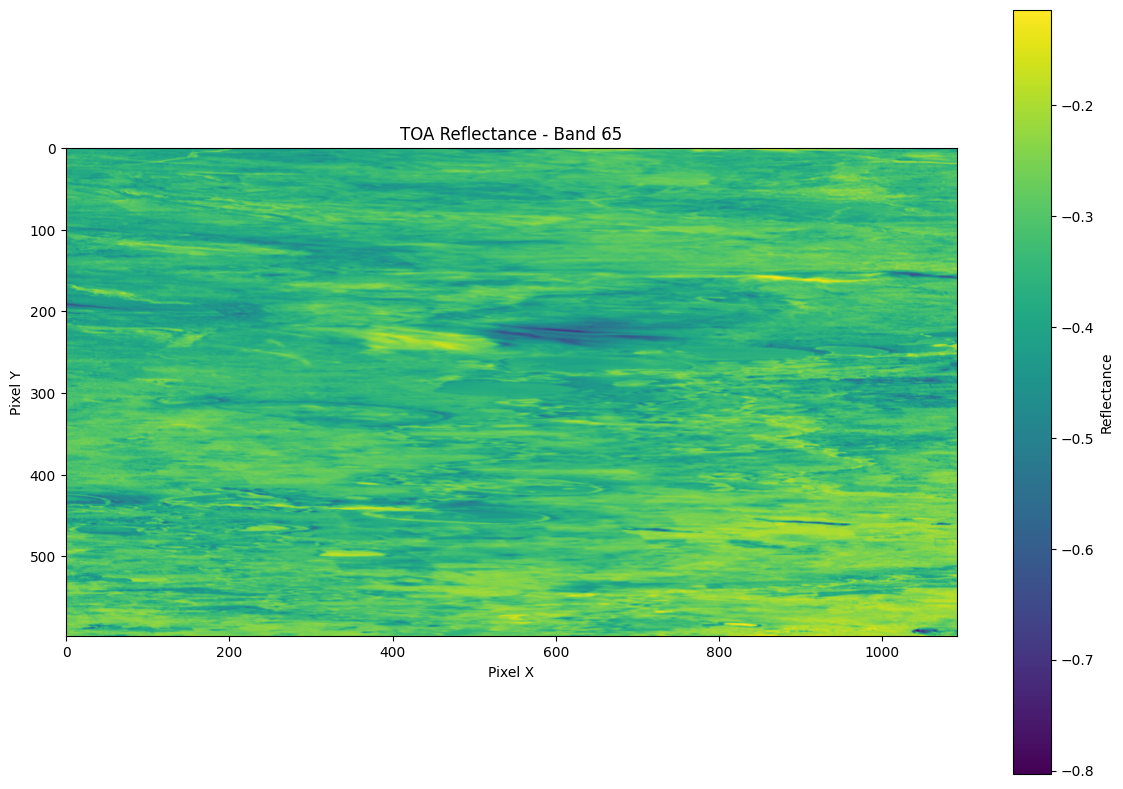

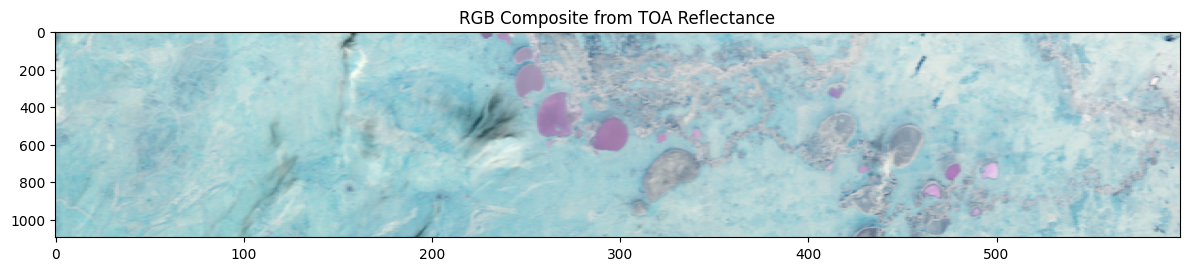

In [6]:
TOA=satobj.l1d_cube

# Plot the TOA (Top of Atmosphere) reflectance cube
plt.figure(figsize=(12, 8))

# Select a band to visualize (e.g., band 10)
band_index = 65
band_data = TOA[:, :, band_index]

# Create the plot
plt.imshow(band_data, cmap='viridis')
plt.colorbar(label='Reflectance')
plt.title(f'TOA Reflectance - Band {band_index}')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.tight_layout()
plt.show()

# Optional: Plot a RGB composite if you want a true color image
# Assuming bands 2, 1, 0 correspond roughly to R, G, B (adjust as needed)
plt.figure(figsize=(12, 8))
rgb = satobj.l1d_cube[:, :, [69, 46, 26]]
# Normalize to 0-1 range for display
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())
plt.imshow(np.rot90(rgb_norm), aspect=0.1)
plt.title('RGB Composite from TOA Reflectance')
plt.tight_layout()
plt.show()


### GEOREF AND RESAMPLE

In [14]:
satobj.run_direct_georeferencing()

[INFO] Running track geometry computations...
[INFO] Running angles geometry computations...


In [19]:
from hypso.geometry_definition import generate_area_def
bbox=satobj.bbox
area_def = generate_area_def(area_id = 'New area',
                            proj_id = 'id',
                            description = 'new area',
                            bbox = bbox,
                            height = 512,
                            width = 512
                            )

# Display area information
area_def

d:\anaconda3\envs\Hypso\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Area ID: New area
Description: id
Projection ID: new area
Projection: {'ellps': 'bessel', 'lat_0': '-90', 'lat_ts': '-32.3501334815142', 'lon_0': '142.340857265499', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 512
Number of rows: 512
Area extent: (-63661.7266, 5213235.6274, 68069.7353, 5574205.8523)

In [21]:
from hypso.resample import resample_l1a_cube, resample_l1b_cube, resample_l1c_cube, resample_l1d_cube

# Resample L1a cube
resampled_l1a_cube, resampled_latitudes, resampled_longitudes = resample_l1a_cube(satobj = satobj, area_def=area_def, use_indirect_georef=False)

d:\anaconda3\envs\Hypso\lib\site-packages\hypso\resample\resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)
d:\anaconda3\envs\Hypso\lib\site-packages\hypso\resample\resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)


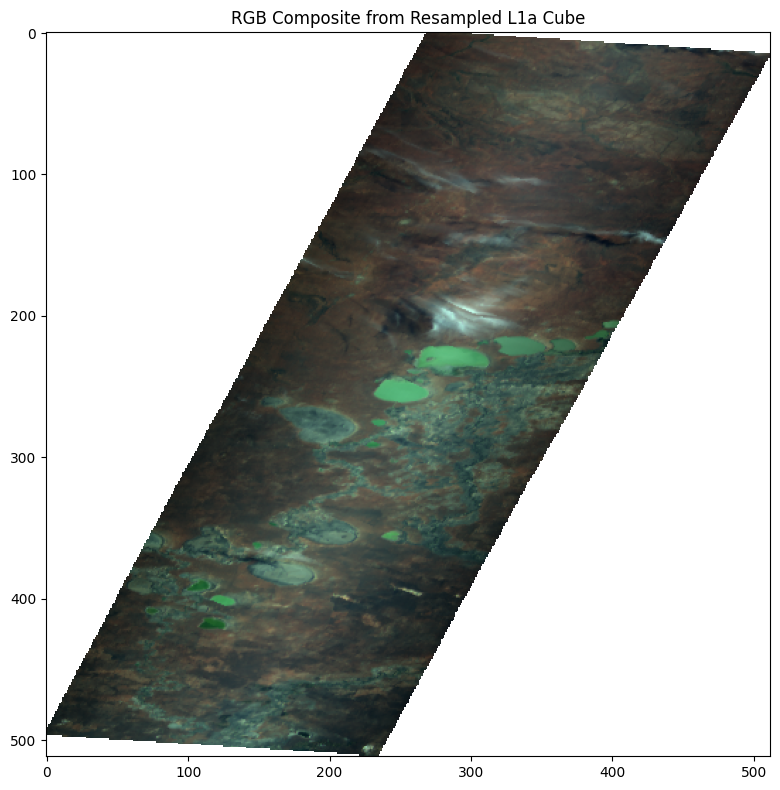

In [25]:
longitudes, latitudes = area_def.get_lonlats()

# Create an RGB composite from the resampled L1a cube
# Using bands that correspond roughly to R, G, B (similar to the earlier RGB composite)
rgb = resampled_l1a_cube[:, :, [69, 46, 26]]

# Normalize to 0-1 range for display
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

# Create a figure
plt.figure(figsize=(10, 8))

# Display the RGB composite
plt.imshow(rgb_norm)
plt.title('RGB Composite from Resampled L1a Cube')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
from hypso.resample import resample_dataarray_bilinear, resample_dataarray_kd_tree_nearest

# Resampling functions can also be called directly. You can pass any data as an xarray to be resampled.

# Kd tree nearest resampling (recommended for hyperspectral data)
resampled_l1a_cube_kdtree = resample_dataarray_kd_tree_nearest(area_def = area_def, 
                                        data = satobj.l1a_cube,
                                        latitudes = satobj.latitudes,
                                        longitudes = satobj.longitudes,
                                        radius_of_influence=satobj.resolution)


# Bilinear resampling
resampled_l1a_cube_bilinear = output = resample_dataarray_bilinear(area_def = area_def, 
                                        data = satobj.l1a_cube,
                                        latitudes = satobj.latitudes,
                                        longitudes = satobj.longitudes,
                                        )

d:\anaconda3\envs\Hypso\lib\site-packages\hypso\resample\resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)
d:\anaconda3\envs\Hypso\lib\site-packages\hypso\resample\resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)
d:\anaconda3\envs\Hypso\lib\site-p

In [32]:
from hypso.satpy import get_l1a_satpy_scene,get_l1b_satpy_scene,get_l1c_satpy_scene,get_l1d_satpy_scene

# Export HYPSO capture as a SatPy scene
scene = get_l1a_satpy_scene(satobj=satobj, use_indirect_georef=False)